<a href="https://colab.research.google.com/github/KauaHenSilva/python_gesture_recognition/blob/main/body_points_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação das bibliotecas

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

### Setup

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


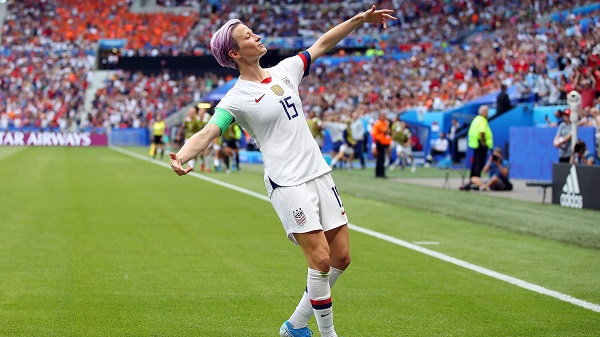

In [3]:
img = cv2.imread('/content/drive/MyDrive/Visão Computacional Guia Completo/Images/megan.jpg')
cv2_imshow(img)

In [4]:
img.shape

(337, 600, 3)

In [5]:
img_blob = cv2.dnn.blobFromImage(img, 1.0/255, (img.shape[1], img.shape[0]))
img_blob.shape

(1, 3, 337, 600)

### Carregamento rede neural pré-treinada

In [7]:
network = cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/Visão Computacional Guia Completo/Weights/pose_deploy_linevec_faster_4_stages.prototxt', '/content/drive/MyDrive/Visão Computacional Guia Completo/Weights/pose_iter_160000.caffemodel')

In [9]:
network.getLayerNames()

('conv1_1',
 'relu1_1',
 'conv1_2',
 'relu1_2',
 'pool1_stage1',
 'conv2_1',
 'relu2_1',
 'conv2_2',
 'relu2_2',
 'pool2_stage1',
 'conv3_1',
 'relu3_1',
 'conv3_2',
 'relu3_2',
 'conv3_3',
 'relu3_3',
 'conv3_4',
 'relu3_4',
 'pool3_stage1',
 'conv4_1',
 'relu4_1',
 'conv4_2',
 'relu4_2',
 'conv4_3_CPM',
 'relu4_3_CPM',
 'conv4_4_CPM',
 'relu4_4_CPM',
 'conv5_1_CPM_L1',
 'relu5_1_CPM_L1',
 'conv5_1_CPM_L2',
 'relu5_1_CPM_L2',
 'conv5_2_CPM_L1',
 'relu5_2_CPM_L1',
 'conv5_2_CPM_L2',
 'relu5_2_CPM_L2',
 'conv5_3_CPM_L1',
 'relu5_3_CPM_L1',
 'conv5_3_CPM_L2',
 'relu5_3_CPM_L2',
 'conv5_4_CPM_L1',
 'relu5_4_CPM_L1',
 'conv5_4_CPM_L2',
 'relu5_4_CPM_L2',
 'conv5_5_CPM_L1',
 'conv5_5_CPM_L2',
 'concat_stage2',
 'Mconv1_stage2_L1',
 'Mrelu1_stage2_L1',
 'Mconv1_stage2_L2',
 'Mrelu1_stage2_L2',
 'Mconv2_stage2_L1',
 'Mrelu2_stage2_L1',
 'Mconv2_stage2_L2',
 'Mrelu2_stage2_L2',
 'Mconv3_stage2_L1',
 'Mrelu3_stage2_L1',
 'Mconv3_stage2_L2',
 'Mrelu3_stage2_L2',
 'Mconv4_stage2_L1',
 'Mrelu4_sta

In [11]:
len(network.getLayerNames())

127

### Previsão dos pontos corporais

In [12]:
network.setInput(img_blob)
output = network.forward()

In [13]:
output.shape

(1, 44, 43, 75)

In [14]:
posicao_largura = output.shape[3]
posicao_altura = output.shape[2]

posicao_largura, posicao_altura

(75, 43)

In [26]:
numero_de_pontos = 15
pontos = []
threshold = 0.5

for i in range(numero_de_pontos):
  mapa_confianca = output[0, i, :, :]
  # print(mapa_confianca)
  # print(len(mapa_confianca))
  _, confianca, _, ponto = cv2.minMaxLoc(mapa_confianca)

  print(confianca, ponto)

  x = int((img.shape[1] * ponto[0]) / posicao_largura)
  y = int((img.shape[0] * ponto[1]) / posicao_altura)

  print(x, y)

  if  confianca > threshold:
    cv2.circle(img, (x, y), 5, (0,255,0), thickness=-1)
    cv2.putText(img, f'{i}', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0, 255))
    pontos.append((x, y))
  else:
    pontos.append(None)

0.7554596662521362 (28, 3)
224 23
0.9123879075050354 (31, 8)
248 62
0.6697722673416138 (29, 12)
232 94
0.7503767609596252 (26, 16)
208 125
0.7385097146034241 (22, 19)
176 148
0.7186093330383301 (35, 8)
280 62
0.7753999829292297 (40, 5)
320 39
0.7418547868728638 (45, 2)
360 15
0.5037320256233215 (36, 23)
288 180
0.7334719300270081 (40, 32)
320 250
0.6221848130226135 (40, 41)
320 321
0.5226558446884155 (39, 21)
312 164
0.94032222032547 (42, 32)
336 250
0.7596977949142456 (37, 39)
296 305
0.7704717516899109 (35, 16)
280 125


In [27]:
pontos

[(224, 23),
 (248, 62),
 (232, 94),
 (208, 125),
 (176, 148),
 (280, 62),
 (320, 39),
 (360, 15),
 (288, 180),
 (320, 250),
 (320, 321),
 (312, 164),
 (336, 250),
 (296, 305),
 (280, 125)]

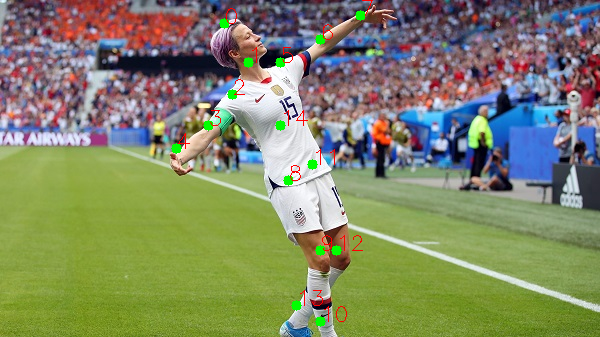

In [28]:
cv2_imshow(img)